**Аренда самокатов GoFast**<br>
Цель проекта: проанализировать данные и проверить гипотезы, которые могут помочь бизнесу вырасти.<br>
Общая информация о проекте и данных:<br>
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
* без подписки<br>
    абонентская плата отсутствует;<br>
    стоимость одной минуты поездки — 8 рублей;<br>
    стоимость старта (начала поездки) — 50 рублей;<br>
* с подпиской Ultra<br>
    абонентская плата — 199 рублей в месяц;<br>
    стоимость одной минуты поездки — 6 рублей;<br>
    стоимость старта — бесплатно.<br><br>

В основных данных есть информация о пользователях, их поездках и подписках.<br><br>
Пути к файлам с соответствующими данными:<br>
/datasets/users_go.csv<br>
/datasets/rides_go.csv<br>
/datasets/subscriptions_go.csv<br>

План проекта:<br>
1) Загрузка данных<br>
2) Предобработка данных<br>
3) Исследовательский анализ данных<br>
4) Объединение данных<br>
5) Подсчёт выручки<br>
6) Проверка гипотез<br>
7) Общий вывод о работе<br>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subs = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
subs.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [7]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Вывод:** <br>
Пропусков нет, названия столбцов в норме. Следует обработать некорректный тип данных для даты в таблице с поездками.

#### Шаг 2. Предобработка данных

Приведем столбец с датой к соответствующему типу.

In [9]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Проверим наличие явных дубликатов.

In [10]:
users.duplicated().sum()

31

In [11]:
rides.duplicated().sum()

0

In [12]:
subs.duplicated().sum()

0

В таблице с пользователями есть 31 явный дубликат. Удалим их.

In [13]:
users.drop_duplicates(inplace=True)
users.duplicated().sum()

0

Проверим данные на неявные дубликаты и изучим уникальные значения столбцов.

In [14]:
users['user_id'].duplicated().sum()

0

In [15]:
sorted(users['age'].unique())

[12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 43]

In [16]:
sorted(users['city'].unique())

['Екатеринбург',
 'Краснодар',
 'Москва',
 'Омск',
 'Пятигорск',
 'Ростов-на-Дону',
 'Сочи',
 'Тюмень']

In [17]:
sorted(users['subscription_type'].unique())

['free', 'ultra']

Создам новый столбец с номером месяца

In [18]:
rides['month'] = rides['date'].dt.month
rides['month'].unique()

array([ 1,  4,  8, 10, 11, 12,  3,  6,  7,  2,  5,  9])

**Вывод:** <br>
Удалены явные дубликаты, типы данных приведены к подабающему виду.<br> 
Для удобства дальнейшей работы добавлен новый столбец с месяцем совершения поездки.<br>
Считаю данные готовыми к анализу.

#### Шаг 3. Исследовательский анализ данных

Опишем и визуализируем следующую информацию:

*Частота встречаемости городов*

In [19]:
users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [20]:
city_rating = users['city'].value_counts() / len(users) * 100
city_rating

Пятигорск         14.276402
Екатеринбург      13.298566
Ростов-на-Дону    12.907432
Краснодар         12.581486
Сочи              12.320730
Омск              11.929596
Тюмень            11.734029
Москва            10.951760
Name: city, dtype: float64

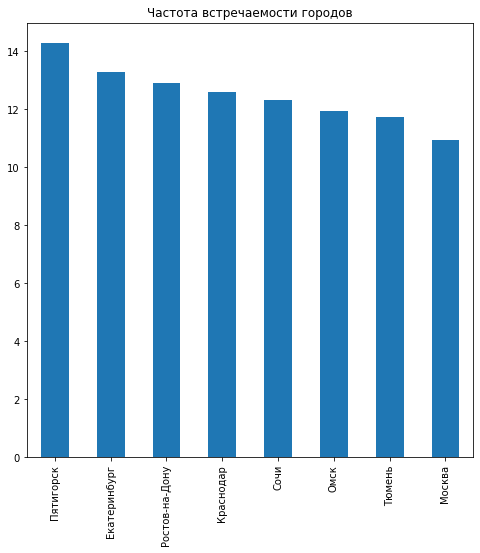

In [21]:
city_rating.plot(kind='bar',
                 figsize=(8,8),
                 title='Частота встречаемости городов'
                );

По параметру город данные распределены равномерно, без явного преобладания отдельных городов.

*Соотношение пользователей с подпиской и без подписки*

In [22]:
subs_rating = users['subscription_type'].value_counts() / len(users) * 100
subs_rating

free     54.432855
ultra    45.567145
Name: subscription_type, dtype: float64

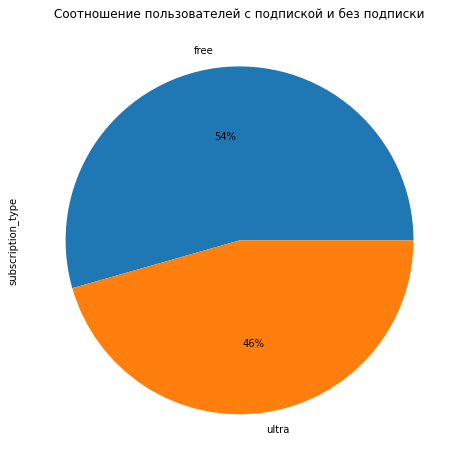

In [23]:
subs_rating.plot(kind='pie',
                 autopct='%1.0f%%',
                 figsize=(8,8),
                 title='Cоотношение пользователей с подпиской и без подписки'
                );

Пользователей с бесплатной подпиской незначительно больше, что вполне естественно.

In [24]:
users['age'].value_counts().sort_values(ascending=False)

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

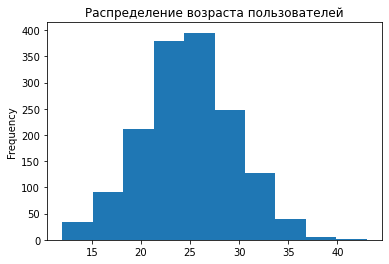

In [25]:
users['age'].plot(kind='hist',
                  title='Распределение возраста пользователей');

In [26]:
users['age'].median()

25.0

Возраст пользователей распределен нормально с медианным значением 25 лет

*Расстояние, которое пользователь преодолел за одну поездку*

In [27]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

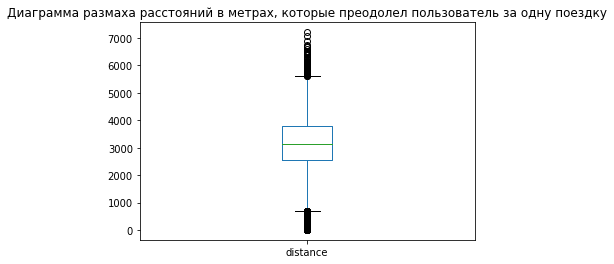

In [28]:
rides['distance'].plot.box(title='Диаграмма размаха расстояний в метрах, которые преодолел пользователь за одну поездку');

Оставим только те значения, которые не превосходят значения 'среднее + 3 стандартных отклонения'

In [29]:
dis_std = rides['distance'].std()
dis_mean = rides['distance'].mean()
max_value_dis = dis_mean + 3 * dis_std


*Продолжительность поездок*

In [30]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

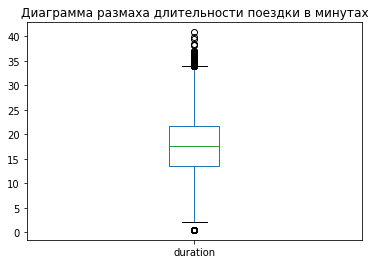

In [31]:
rides['duration'].plot.box(title='Диаграмма размаха длительности поездки в минутах');

Оставим только те значения, которые не превосходят значения 'среднее + 3 стандартных отклонения'

In [32]:
dur_std = rides['duration'].std()
dur_mean = rides['duration'].mean()
max_value_dur = dur_mean + 3 * dur_std

**Вывод:**<br>
По параметру город данные распределены равномерно, без явного преобладания отдельных городов.<br>
Больше всего данных о Пятигорске - 14%, меньше всего о Москве - 11%.<br>
Пользователей с бесплатной подпиской 54%, с платной - 46%.<br>
Основная доля пользователей в возрасте от 22 до 28 лет с пиком в 25 лет.<br>
Как правило, расстояние за одну поездку находится в диапазоне от 2500 до 3700 метров - из анализа были исключены наблюдения, в которых дистанция поездки превосходит значение 'среднее + 3 стандартных отклонения'.<br>
В основном, поездки занимают от 13 до 22 минут, верхняя граница задана по аналогии с рассотянием за одну поездку.

#### Шаг 4. Объединение данных

Объединим все таблицы в одну

In [33]:
rides_users = rides.merge(users, on='user_id', how='left')
rides_users.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra


In [34]:
data = rides_users.merge(subs, on='subscription_type', how='left')
data.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


Разделим данные по типу подписки

In [35]:
data_ultra = data[data['subscription_type']=='ultra']
data_ultra.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [36]:
data_free = data[data['subscription_type']=='free']
data_free.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


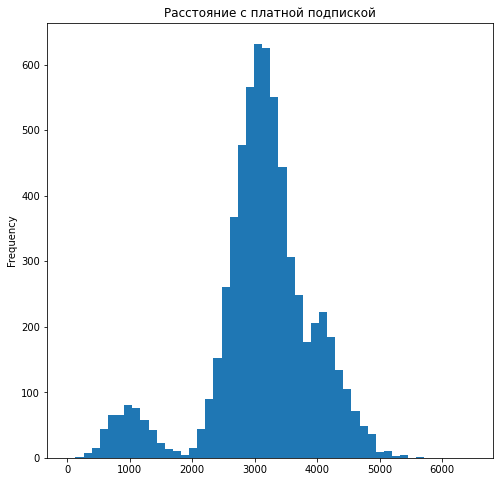

In [37]:
data_ultra['distance'].plot(kind='hist',
                            bins=50,
                            range=(0, 6500),
                            title='Расстояние с платной подпиской',
                            figsize=(8,8)
                           );

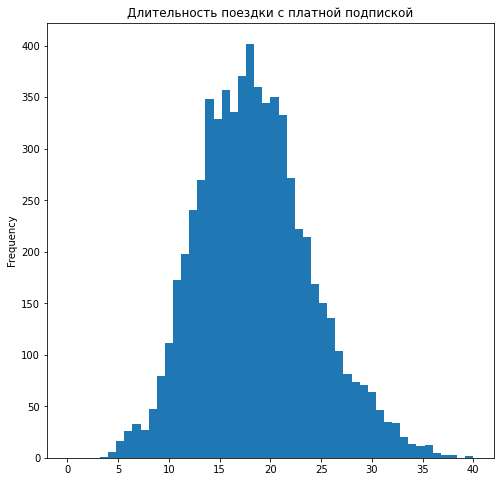

In [38]:
data_ultra['duration'].plot(kind='hist',
                            bins=50,
                            range=(0, 40),
                            title='Длительность поездки с платной подпиской',
                            figsize=(8,8)
                           );

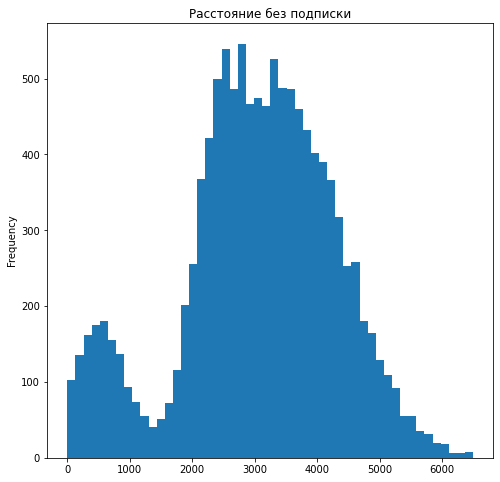

In [39]:
data_free['distance'].plot(kind='hist',
                            bins=50,
                            range=(0, 6500),
                            title='Расстояние без подписки',
                            figsize=(8,8)
                           );

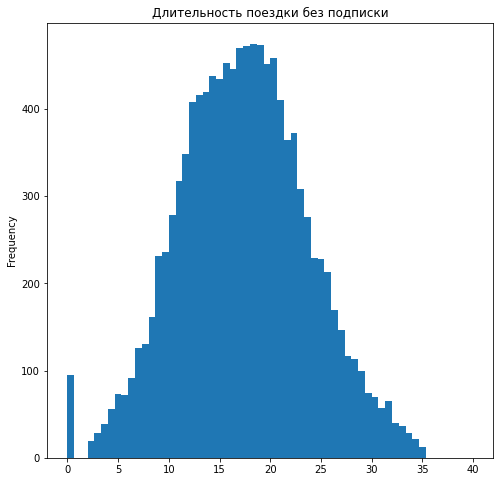

In [40]:
data_free['duration'].plot(kind='hist',
                            bins=60,
                            range=(0, 40),
                            title='Длительность поездки без подписки',
                            figsize=(8,8)
                           );

**Вывод:**<br>
Все три таблицы объединены в одну - 'data'. По двум таблицам 'data_free' и 'data_ultra' разделены пользователи с бесплатным тарифом и платной подпиской соответственно.<br><br>
Для пользователей без подписки свойственно:
* длительность поездки от 8 до 26 минут.<br>
* расстояние за одну поездку от 2 до 4.5 км.<br><br>

Для пользователей с платной подпиской:<br>
* длительность поездки от 12 до 23 минут<br>
* расстояние за одну поездку от 2.5 до 3.5 км<br>


#### Шаг 5. Подсчёт выручки

Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлим до следующего целого числа.

In [41]:
data['duration'] = data['duration'].apply(np.ceil)
data.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,26.0,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,16.0,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,7.0,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,19.0,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,27.0,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


Создадим датафрейм с агрегированными данными о поездках с суммарным расстоянием, количеством поездок и суммарным временем для каждого пользователя за каждый месяц.

Для дальнейшего анализа добавлю тип подписки и средние значения стоимости одной минуты поездки, стоимости начала поездки, стоимости ежемесячного платежа.

In [42]:
data_month_profit = (data
                         .pivot_table(index=['month', 'user_id'], 
                                      values=['distance','name', 'duration', 'minute_price', 
                                              'start_ride_price', 'subscription_fee', 'subscription_type'], 
                                      aggfunc={'distance': 'sum', 
                                               'name': 'count', 
                                               'duration': 'sum',
                                               'subscription_type': 'min',
                                               'subscription_fee': 'mean',
                                               'start_ride_price': 'mean',
                                               'minute_price': 'mean',})
)
data_month_profit.rename(columns={'name': 'count'}, inplace=True)
data_month_profit.head()

distance  duration  minute_price  count  start_ride_price  \
month user_id                                                                 
1     1        7027.511294      42.0             6      2                 0   
      3        3061.777147      13.0             6      1                 0   
      5        3914.646990      13.0             6      1                 0   
      7        6478.080979      28.0             6      2                 0   
      12       3577.151148      33.0             6      1                 0   

               subscription_fee subscription_type  
month user_id                                      
1     1                     199             ultra  
      3                     199             ultra  
      5                     199             ultra  
      7                     199             ultra  
      12                    199             ultra

In [43]:
data_month_profit.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1) to (12, 1534)
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance           11331 non-null  float64
 1   duration           11331 non-null  float64
 2   minute_price       11331 non-null  int64  
 3   count              11331 non-null  int64  
 4   start_ride_price   11331 non-null  int64  
 5   subscription_fee   11331 non-null  int64  
 6   subscription_type  11331 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 665.0+ KB


In [44]:
def month_profit(row):
    return row['start_ride_price'] * row['count'] + row['minute_price'] * row['duration'] + row['subscription_fee']

In [45]:
data_month_profit['month_profit'] = data_month_profit.apply(month_profit, axis=1)
data_month_profit.head()

distance  duration  minute_price  count  start_ride_price  \
month user_id                                                                 
1     1        7027.511294      42.0             6      2                 0   
      3        3061.777147      13.0             6      1                 0   
      5        3914.646990      13.0             6      1                 0   
      7        6478.080979      28.0             6      2                 0   
      12       3577.151148      33.0             6      1                 0   

               subscription_fee subscription_type  month_profit  
month user_id                                                    
1     1                     199             ultra         451.0  
      3                     199             ultra         277.0  
      5                     199             ultra         277.0  
      7                     199             ultra         367.0  
      12                    199             ultra         397.0

**Вывод:**<br>
Был создан датафрейм с агрегированными данными о поездках.<br>
Датафрейм содержит суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, а также средние значения стоимости одной минуты поездки, стоимости начала поездки, стоимости ежемесячного платежа.<br>
В столбце month_profit содержится информация о помесячной выручке, которую принес каждый пользователь.

#### Шаг 6. Проверка гипотез

**Гипотеза**: Пользователи с подпиской тратят тратят на поездки времени больше, чем пользователи без подписки. 

Н0 = время пользователей с подпиской = время пользователей без подписки<br>
Н1 = время пользователей с подпиской > время пользователей без подписки

In [46]:
duration_ultra = data_ultra['duration'].values
duration_free = data_free['duration'].values

alpha = 0.05

result = st.ttest_ind(duration_ultra, duration_free, alternative='greater')

print(result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Вывод:**<br>
На данный момент время пользователей с подпиской действительно больше, чем у пользователей без подписки.

**Гипотеза**: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

Н0 = среднее расстояние пользователей с подпиской = 3130<br>
Н1 = среднее расстояние пользователей с подпиской > 3130

In [47]:
distance_ultra = data_ultra['distance']

print('Среднее выборки = ', distance_ultra.mean())

value = 3130

alpha = 0.05

result = st.ttest_1samp(distance_ultra, value, alternative='greater')

print(result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Среднее выборки =  3115.4453880370247
0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


**Вывод:**<br>
На данный момент гипотезу отвергнуть нельзя, поэтому полагаем, среднее рассотяние, которое пользователь с подпиской проезжает за одну поездку, не превышает 3130

**Гипотеза**: Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Н0 = помесячная выручка от пользователей с подпиской = помесячная выручка от пользователей без подписки<br>
H1 = помесячная выручка от пользователей с подпиской > помесячная выручка от пользователей без подписки

In [48]:
month_ultra = data_month_profit.loc[data_month_profit['subscription_type']=='ultra', 'month_profit'].values.astype(int)
month_free = data_month_profit.loc[data_month_profit['subscription_type']=='free', 'month_profit'].values.astype(int)

alpha = 0.05

result = st.ttest_ind(month_ultra, month_free, alternative='greater')

print(result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')


1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод:**<br>
Не получилось опровергнуть, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки 

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Н0 = среднее значение кол-ва обращений в техподдержку до изменения = среднее значение кол-ва обращений в техподдержку после изменения<br>
Н1 = среднее значение кол-ва обращений в техподдержку до изменения != среднее значение кол-ва обращений в техподдержку после изменения<br>

Проверить гипотезу можно методом ttest_rel()

#### Шаг 7. Вывод

Полученные данные были проверены на коррекность. Пропусков нет, названия столбцов в норме.<br>
Удалены явные дубликаты, типы данных приведены к подабающему виду.<br>
Для удобства дальнейшей работы добавлен новый столбец с месяцем совершения поездки.<br>

По параметру город данные распределены равномерно, без явного преобладания отдельных городов.<br>
Больше всего данных о Пятигорске - 14%, меньше всего о Москве - 11%.<br>
Пользователей с бесплатной подпиской 54%, с платной - 46%.<br>
Основная доля пользователей в возрасте от 22 до 28 лет с пиком в 25 лет.<br>
Как правило, расстояние за одну поездку находится в диапазоне от 2500 до 3700 метров - из анализа были исключены наблюдения, в которых дистанция поездки превосходит значение 'среднее + 3 стандартных отклонения'.<br>
В основном, поездки занимают от 13 до 22 минут, верхняя граница задана по аналогии с рассотянием за одну поездку.<br>

Все три таблицы объединены в одну - 'data'. По двум таблицам 'data_free' и 'data_ultra' разделены пользователи с бесплатным тарифом и платной подпиской соответственно.<br><br>
Для пользователей без подписки свойственно:
* длительность поездки от 8 до 26 минут.<br>
* расстояние за одну поездку от 2 до 4.5 км.<br><br>

Для пользователей с платной подпиской:<br>
* длительность поездки от 12 до 23 минут<br>
* расстояние за одну поездку от 2.5 до 3.5 км<br>

Был создан датафрейм с агрегированными данными о поездках.<br>
Датафрейм содержит суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, а также средние значения стоимости одной минуты поездки, стоимости начала поездки, стоимости ежемесячного платежа.<br>
В столбце month_profit содержится информация о помесячной выручке, которую принес каждый пользователь.<br>

Был проверен ряд гипотез и установлены следующие факты:<br>

* На данный момент время пользователей с подпиской действительно больше, чем у пользователей без подписки.<br>
* На данный момент гипотезу отвергнуть нельзя, поэтому полагаем, среднее рассотяние, которое пользователь с подпиской проезжает за одну поездку, не превышает 3130<br>
* Не получилось опровергнуть, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки<br>